In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/achint/Raghava/books/NLP/train.csv")

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
df.shape

(159571, 8)

In [10]:
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(df[col].value_counts())

0    144277
1     15294
Name: toxic, dtype: int64
0    157976
1      1595
Name: severe_toxic, dtype: int64
0    151122
1      8449
Name: obscene, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: insult, dtype: int64
0    158166
1      1405
Name: identity_hate, dtype: int64


In [12]:
df.columns.values

array(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'], dtype=object)

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
plt.figure(figsize=(40, 25))


<Figure size 2880x1800 with 0 Axes>

<Figure size 2880x1800 with 0 Axes>

In [21]:
comments = df.comment_text.values

In [22]:
comments

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [24]:
colud_comments = WordCloud(stopwords=STOPWORDS,
         background_color='black',
         collocations=False,
         width=2500,
         height=1800,
         ).generate(' '.join(comments))

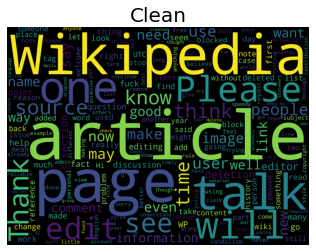

In [27]:
plt.axis('off')
plt.title("Clean", fontsize=20)
plt.imshow(colud_comments)

In [30]:
for c,i in enumerate(comments[:100]):
    print(c,i)

0 Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
1 D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
2 Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
3 "
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references 

In [33]:
comments[22]

'"\n\n Snowflakes are NOT always symmetrical! \n\nUnder Geometry it is stated that ""A snowflake always has six symmetric arms."" This assertion is simply not true! According to Kenneth Libbrecht, ""The rather unattractive irregular crystals are by far the most common variety."" http://www.its.caltech.edu/~atomic/snowcrystals/myths/myths.htm#perfection Someone really need to take a look at his site and get FACTS off of it because I still see a decent number of falsities on this page. (forgive me Im new at this and dont want to edit anything)"'

In [34]:
import re

In [68]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [69]:
for c in [comments[22], comments[23]]:
    print(c,'\n!!!!!!!!!!')
    print(clean_text(c), '\n @@@@@@')

"

 Snowflakes are NOT always symmetrical! 

Under Geometry it is stated that ""A snowflake always has six symmetric arms."" This assertion is simply not true! According to Kenneth Libbrecht, ""The rather unattractive irregular crystals are by far the most common variety."" http://www.its.caltech.edu/~atomic/snowcrystals/myths/myths.htm#perfection Someone really need to take a look at his site and get FACTS off of it because I still see a decent number of falsities on this page. (forgive me Im new at this and dont want to edit anything)" 
!!!!!!!!!!
snowflakes are not always symmetrical under geometry it is stated that a snowflake always has six symmetric arms this assertion is simply not true according to kenneth libbrecht the rather unattractive irregular crystals are by far the most common variety http www its caltech edu atomic snowcrystals myths myths htm perfection someone really need to take a look at his site and get facts off of it because i still see a decent number of falsit

In [70]:
df['comment_text'] = df['comment_text'].map(lambda com:clean_text(com))

In [74]:
df['comment_text'][23], df.columns

('the signpost 24 september 2012 read this signpost in full single page unsubscribe',
 Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
        'insult', 'identity_hate'],
       dtype='object'))

In [75]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk
from sklearn.metrics import accuracy_score

In [85]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [86]:
train, test = train_test_split(df, random_state=42, test_size=0.33,shuffle=True)

In [87]:
x_train = train.comment_text
x_test = test.comment_text

In [88]:
x_train.shape, x_test.shape

((106912,), (52659,))

In [89]:
NB_Classifier = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])

In [94]:
for category in categories:
    print('...preprocessing {}'.format(category))
    model = NB_Classifier.fit(x_train, train[category])
    pre = NB_Classifier.predict(x_test)
    print('accuracy score {}'.format(accuracy_score(test[category], pre)))
    

...preprocessing toxic
accuracy score 0.9193300290548624
...preprocessing severe_toxic
accuracy score 0.9899922140564765
...preprocessing obscene
accuracy score 0.9516132095178412
...preprocessing threat
accuracy score 0.9971324939706413
...preprocessing insult
accuracy score 0.9517461402609241
...preprocessing identity_hate
accuracy score 0.9910366698949847


In [99]:
test[category].value_counts()

0    52188
1      471
Name: identity_hate, dtype: int64